# SI Calibrated Mean - Synthetic 

#### Box plots illustrating the differences between the five best-calibrated parameters and synthetic parameters 

In [1]:
import sys,os
# get utils path from a folder up
curr_dir = os.getcwd()
one_folder_up = os.path.dirname(curr_dir)
sys.path.append(one_folder_up)
import numpy as np
import pandas as pd
import utils as ut
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm
import seaborn as sns
%matplotlib inline

In [2]:
def par_value_minus_mean_box_plot(df_x,x_true):
    ''' plots the spaghetti plot of modeled v.s. observed values 
        df_x: parameter dataframe
        df_y: model output dataframe
        logy: True enables the logplot option
    '''
    xx=df_x.copy()
    xx.loc[len(df_x.index)] = pd.Series(x_true, index=df_x.columns)
    
#    fig, ax = plt.subplots(1,2,figsize=(14, 4))
    
    ax[0].boxplot((xx-xx.iloc[-1]).iloc[:-1,:].values, labels=xx.columns);
    ax[0].plot(np.zeros(len(xx.columns)+2),'--',color='black',alpha=0.5)
    ax[0].set_xticks(range(1, len(xx.columns) + 1))
    ax[0].set_xticklabels(xx.columns, rotation=45, fontsize=12)
    ax[0].set_xlim([0,len(xx.columns)+1])
    ax[0].set_ylabel('Modeled-Observed', fontsize=12)
            
    std_devs = np.std((xx-xx.iloc[-1]).iloc[:-1,:], axis=0)
    ax[1].bar(range(1, len(xx.columns) + 1), std_devs, tick_label=xx.columns)
    ax[1].set_xticks(range(1, len(xx.columns) + 1))
    ax[1].set_xticklabels(xx.columns, rotation=45, fontsize=12)
    #ax[1].set_title("Standard Deviation of Parameters' Deviations", fontsize=14)
    #ax[1].set_xlabel('Parameter', fontsize=12)
    ax[1].set_ylabel('Standard Deviation', fontsize=12)

def swap_columns(df: pd.DataFrame, col1: str, col2: str) -> pd.DataFrame:
    """
    Swap two columns in a pandas DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame in which to swap columns.
    col1 (str): The name of the first column.
    col2 (str): The name of the second column.
    
    Returns:
    pd.DataFrame: The DataFrame with the columns swapped.
    """
    # Make sure both columns exist in the DataFrame
    if col1 not in df.columns or col2 not in df.columns:
        raise ValueError(f"One or both columns: {col1}, {col2} are not in the DataFrame.")
    
    # Get the list of columns
    columns = df.columns.tolist()
    
    # Find the positions of the two columns
    idx1, idx2 = columns.index(col1), columns.index(col2)
    
    # Swap the columns in the list
    columns[idx1], columns[idx2] = columns[idx2], columns[idx1]
    
    # Reorder the DataFrame's columns based on the new order
    return df[columns]

def par_and_target_mean_box_plot(ax,df_x,x_true,df_y,y_true,label,title=True):
    ''' ax: plot id 
        df_x: parameter dataframe
        x_true: true parameter
        df_y: model output dataframe
        y_true: true target
        logy: True enables the logplot option
    '''

    #add true values as the last row to the dataframes
    xx=df_x.copy()
    xx.loc[len(df_x.index)] = pd.Series(x_true, index=df_x.columns)

    yy=df_y.copy()
    yy.loc[len(df_y.index)] = pd.Series(y_true.values, index=df_y.columns)
    
#    fig, ax = plt.subplots(1,2,figsize=(14, 4))

    if label[0]=='A)':
        xx.columns=['$c_{max}^0$','$c_{max}^1$','$c_{max}^2$','$c_{max}^3$']
        yy.columns=['$GPP_0$','$GPP_1$','$GPP_2$','$GPP_3$']

    elif label[0]=='C)':
        xx.columns=['$n_{max}^0$','$n_{max}^1$','$n_{max}^2$','$n_{max}^3$',
                        '$kr_b^{leaf0}$','$kr_b^{leaf1}$','$kr_b^{leaf2}$','$kr_b^{leaf3}$',\
                        '$kr_b^{stem0}$','$kr_b^{stem1}$','$kr_b^{stem2}$',\
                        '$kr_b^{root0}$','$kr_b^{root1}$','$kr_b^{root2}$']
        #model_header =  ['NPP0','NPP1','NPP2','NPP3',\
        #            'VEGC00','VEGC10','VEGC20',\
        #            'VEGC01','VEGC11','VEGC21',\
        #            'VEGC02','VEGC12','VEGC22',\
        #            'VEGC03'
        #            ]
        yy.columns=['$NNP_0$','$NNP_1$','$NNP_2$','$NNP_3$',
                        '$C_{leaf0}$','$C_{stem0}$','$C_{root0}$',
                        '$C_{leaf1}$','$C_{stem1}$','$C_{root1}$',
                        '$C_{leaf2}$','$C_{stem2}$','$C_{root2}$',
                        '$C_{leaf3}$']
        yy = swap_columns(yy, '$C_{stem0}$', '$C_{leaf1}$')
        yy = swap_columns(yy, '$C_{root0}$', '$C_{leaf2}$')
        yy = swap_columns(yy, '$C_{stem0}$', '$C_{leaf3}$')
        yy = swap_columns(yy, '$C_{stem1}$', '$C_{stem0}$')
        yy = swap_columns(yy, '$C_{root1}$', '$C_{stem1}$')
        yy = swap_columns(yy, '$C_{root0}$', '$C_{stem2}$')
        yy = swap_columns(yy, '$C_{root1}$', '$C_{root2}$')
    
    elif label[0]=='E)':
        xx.columns=['$c_{fall}^{leaf0}$','$c_{fall}^{leaf1}$','$c_{fall}^{leaf2}$',
                      '$c_{fall}^{leaf3}$',
                      '$c_{fall}^{stem0}$','$c_{fall}^{stem1}$','$c_{fall}^{stem2}$',
                      '$c_{fall}^{root0}$','$c_{fall}^{root1}$','$c_{fall}^{root2}$']
        yy.columns=['$C_{leaf0}$','$C_{stem0}$','$C_{root0}$',
                    '$C_{leaf1}$','$C_{stem1}$','$C_{root1}$',
                    '$C_{leaf2}$','$C_{stem2}$','$C_{root2}$',
                    '$C_{leaf3}$']
        yy = swap_columns(yy, '$C_{stem0}$', '$C_{leaf1}$')
        yy = swap_columns(yy, '$C_{root0}$', '$C_{leaf2}$')
        yy = swap_columns(yy, '$C_{stem0}$', '$C_{leaf3}$')
        yy = swap_columns(yy, '$C_{stem1}$', '$C_{stem0}$')
        yy = swap_columns(yy, '$C_{root1}$', '$C_{stem1}$')
        yy = swap_columns(yy, '$C_{root0}$', '$C_{stem2}$')
        yy = swap_columns(yy, '$C_{root1}$', '$C_{root2}$')

    elif label[0]=='G)':
        xx.columns=['$n_{fall}^{leaf0}$','$n_{fall}^{leaf1}$','$n_{fall}^{leaf2}$',
                      '$n_{fall}^{leaf3}$',
                      '$n_{fall}^{stem0}$','$n_{fall}^{stem1}$','$n_{fall}^{stem2}$',
                      '$n_{fall}^{root0}$','$n_{fall}^{root1}$','$n_{fall}^{root2}$']
        yy.columns=['$N_{leaf0}$','$N_{stem0}$','$N_{root0}$',
                    '$N_{leaf1}$','$N_{stem1}$','$N_{root1}$',
                    '$N_{leaf2}$','$N_{stem2}$','$N_{root2}$',
                    '$N_{leaf3}$']
        yy = swap_columns(yy, '$N_{stem0}$', '$N_{leaf1}$')
        yy = swap_columns(yy, '$N_{root0}$', '$N_{leaf2}$')
        yy = swap_columns(yy, '$N_{stem0}$', '$N_{leaf3}$')
        yy = swap_columns(yy, '$N_{stem1}$', '$N_{stem0}$')
        yy = swap_columns(yy, '$N_{root1}$', '$N_{stem1}$')
        yy = swap_columns(yy, '$N_{root0}$', '$N_{stem2}$')
        yy = swap_columns(yy, '$N_{root1}$', '$N_{root2}$')

    elif label[0]=='I)':
        xx.columns=['$n^{up}_{micb}$', '$kdc_{rawC}$', '$kdc_{soma}$', '$kdc_{sompr}$', '$kdc_{somcr}$']
        yy.columns=['$C_{shallow}$','$C_{deep}$','$\sum C_{mineral}$','$\sum N_{avail}$']
    
    ax[0].boxplot((xx-xx.iloc[-1]).iloc[:-1,:].values, labels=xx.columns);
    ax[0].plot(np.zeros(len(xx.columns)+2),'--',color='black',alpha=0.5)
    ax[0].set_xticks(range(1, len(xx.columns) + 1))
    ax[0].set_xticklabels(xx.columns, rotation=45, fontsize=12)
    ax[0].set_xlim([0,len(xx.columns)+1])
    ax[0].text(0.05, 0.95, label[0], transform=ax[0].transAxes, fontsize=18, va='top', ha='left',alpha=0.75)
    
    if title:
        ax[0].set_title('Parameters', fontsize=13)
    
    ax[1].boxplot((yy-yy.iloc[-1]).iloc[:-1,:].values, labels=yy.columns);
    ax[1].plot(np.zeros(len(yy.columns)+2),'--',color='black',alpha=0.5)
    ax[1].set_xticklabels(yy.columns, rotation=45, fontsize=12)
    ax[1].text(0.05, 0.95, label[1], transform=ax[1].transAxes, fontsize=18, va='top', ha='left',alpha=0.75)
 
    ax[0].set_ylabel('Calibrated-Synthetic', fontsize=12)
    if title:
        ax[1].set_title('Targets', fontsize=13)
    #fig.tight_layout()

def rmse(x_mean,x_true):
    MSE = np.square(np.subtract(x_mean,x_true)) 
    return np.sqrt(MSE)

In [3]:
def get_gpps(path,model,params):
    df_model = pd.read_csv(path+model,header=None)
    df_param = pd.read_csv(path+params,header=None)
    model_header = ['GPP0','GPP1','GPP2','GPP3']
    df_model.columns = model_header

    df_param = pd.read_csv(path+params,header=None)
    param_header = ['cmax0','cmax1','cmax2','cmax3']
    df_param.columns = param_header

    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
    #xparams_MD1
    rmetric='r2rmse'
    nelem=10
    order=True
    y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
    rmse_GPP_MD1=rmse(y_sort.mean(),df_model.iloc[-1,:]) 

    cmax_true_params = [381.19, 113.93, 210.48, 93.31]
    x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
    rmse_cmax_MD1=rmse(x_sort.mean(),cmax_true_params)
    return x_sort,cmax_true_params,y_sort,df_model.iloc[-1,:]


In [4]:

def get_npp_vegc(path,model,params):
    df_model = pd.read_csv(path+model,header=None)
    df_param = pd.read_csv(path+params,header=None)
    model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                    'VEGC00','VEGC10','VEGC20',\
                    'VEGC01','VEGC11','VEGC21',\
                    'VEGC02','VEGC12','VEGC22',\
                    'VEGC03'
                    ]
    df_model.columns = model_header

    df_param = pd.read_csv(path+params,header=None)
    param_header = ['nmax0','nmax1','nmax2','nmax3',
                'krb00','krb01','krb02','krb03',\
                'krb10','krb11','krb12',\
                'krb20','krb21','krb22']
    df_param.columns = param_header
    df_model.head()

    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
    rmetric='r2rmse'
    nelem=10
    order=True
    y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order).iloc[:5,:-6].copy()
    MSE = np.square(np.subtract(y_sort.mean(),df_model.iloc[-1,:])) 
    rmse_nmax_krb_VEGC_MD1=np.sqrt(MSE)

    nmax_krb_true_params = [3.38, 1.55, 1.00, 3.55, \
                        -6.0, -3.45, -2.95, -4.65, -4.88, -5.15, -6.65, -8.2, -6.2, -3.2]
    x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
    MSE = np.square(np.subtract(x_sort.mean(),nmax_krb_true_params)) 
    rmse_nmax_krb_MD1=np.sqrt(MSE)
    
    return x_sort,nmax_krb_true_params,y_sort,df_model.iloc[-1,:]

In [5]:

def get_vegc(path,model,params):
    df_model = pd.read_csv(path+model,header=None)
    df_param = pd.read_csv(path+params,header=None)
    model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                    'VEGC00','VEGC10','VEGC20',\
                    'VEGC01','VEGC11','VEGC21',\
                    'VEGC02','VEGC12','VEGC22',\
                    'VEGC03'
                    ]
    df_model.columns = model_header

    df_param = pd.read_csv(path+params,header=None)
    param_header = [
                'cfall00','cfall01','cfall02','cfall03',\
                'cfall10','cfall11','cfall12',\
                'cfall20','cfall21','cfall22']
    df_param.columns = param_header
    df_model.head()

    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
    rmetric='r2rmse'
    nelem=10
    order=True
    y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
    MSE = np.square(np.subtract(y_sort.mean(),df_model.iloc[-1,:])) 
    rmse_cfall_VEGC_MD1=np.sqrt(MSE)

    cfall_true_params = [0.001107,0.050722, 0.024987, 0.019928, 0.003407, 0.004790, 
                        0.003590, 0.005149, 0.001171, 0.026025]
    x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
    MSE = np.square(np.subtract(x_sort.mean(),cfall_true_params)) 
    rmse_cfall_MD1=np.sqrt(MSE)

    return x_sort,cfall_true_params,y_sort,df_model.iloc[-1,:]

In [6]:

def get_vegn(path,model,params):
    df_model = pd.read_csv(path+model,header=None)
    df_param = pd.read_csv(path+params,header=None)
    model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                    'VEGC00','VEGC10','VEGC20',\
                    'VEGC01','VEGC11','VEGC21',\
                    'VEGC02','VEGC12','VEGC22',\
                    'VEGC03',\
                    'VEGN00','VEGN10','VEGN20',\
                    'VEGN01','VEGN11','VEGN21',\
                    'VEGN02','VEGN12','VEGN22',\
                    'VEGN03'
                    ]
    df_model.columns = model_header

    df_param = pd.read_csv(path+params,header=None)
    param_header = [
                'nfall00','nfall01','nfall02','nfall03',\
                'nfall10','nfall11','nfall12',\
                'nfall20','nfall21','nfall22']
    df_param.columns = param_header
    df_model.head()

    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
    rmetric='r2rmse'
    nelem=10
    order=True
    y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
    #par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])
    MSE = np.square(np.subtract(y_sort.mean(),df_model.iloc[-1,:])) 
    rmse_nfall_VEGC_MD1=np.sqrt(MSE)

    nfall_true_params = [0.010242, 0.044555, 0.017748, 0.007250, 0.001343, 0.001424, 
                        0.005220, 0.003280, 0.007283, 0.007607]
    x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
    #par_value_minus_mean_box_plot(x_sort,nfall_true_params)
    MSE = np.square(np.subtract(x_sort.mean(),nfall_true_params)) 
    rmse_nfall_MD1=np.sqrt(MSE)

    return x_sort,nfall_true_params,y_sort,df_model.iloc[-1,:]

In [7]:
#'0: EverTree', '1: DecidShrub', '2: DecidTree', '3: Moss'
#    model_header =  ['$NPP_0$','$NPP_1$','$NPP_2$','$NPP_3$',\
#                    '$C_{leaf}^0$','VEGC10','VEGC20',\
#                    '$C_{leaf}^1$','VEGC11','VEGC21',\
#                    '$C_{leaf}^2$','VEGC12','VEGC22',\
#                    '$C_{leaf}^0$',\
                    
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                    'VEGC00','VEGC10','VEGC20',\
                    'VEGC01','VEGC11','VEGC21',\
                    'VEGC02','VEGC12','VEGC22',\
                    'VEGC03',\
                    'VEGN00','VEGN10','VEGN20',\
                    'VEGN01','VEGN11','VEGN21',\
                    'VEGN02','VEGN12','VEGN22',\
                    'VEGN03',   
                    'CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
model_header=model_header[-4:]                  
model_header

['CarbonShallow', 'CarbonDeep', 'CarbonMineralSum', 'AvailableNitrogenSum']

In [8]:
def get_csoil(path,model,params,case):
    df_model = pd.read_csv(path+model,header=None)
    df_param = pd.read_csv(path+params,header=None)
    model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                    'VEGC00','VEGC10','VEGC20',\
                    'VEGC01','VEGC11','VEGC21',\
                    'VEGC02','VEGC12','VEGC22',\
                    'VEGC03',\
                    'VEGN00','VEGN10','VEGN20',\
                    'VEGN01','VEGN11','VEGN21',\
                    'VEGN02','VEGN12','VEGN22',\
                    'VEGN03',   
                    'CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
                    
    if case==50:
        model_header=model_header[-4:] 

    df_model.columns = model_header

    df_param = pd.read_csv(path+params,header=None)
    param_header = [ 'micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']
                
    df_param.columns = param_header
    df_model.head()

    xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
    rmetric='r2rmse'
    nelem=10
    order=True
    y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
    #par_value_minus_mean_box_plot(y_sort,df_model.iloc[-1,:])
    MSE = np.square(np.subtract(y_sort.mean(),df_model.iloc[-1,:])) 
    rmse_soilt_MD1=np.sqrt(MSE)

    true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
                0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
                0.54,     # kdcsoma:   0.58
                0.002,    # kdcsompr:   
                0.00007]  # kdcsomcr:
    x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order)[:].iloc[:5,:-6].copy()
    #par_value_minus_mean_box_plot(x_sort,true_params)
    MSE = np.square(np.subtract(x_sort.mean(),true_params)) 
    rmse_soilp_MD1=np.sqrt(MSE)
    
    return x_sort,true_params,y_sort,df_model.iloc[-1,:]

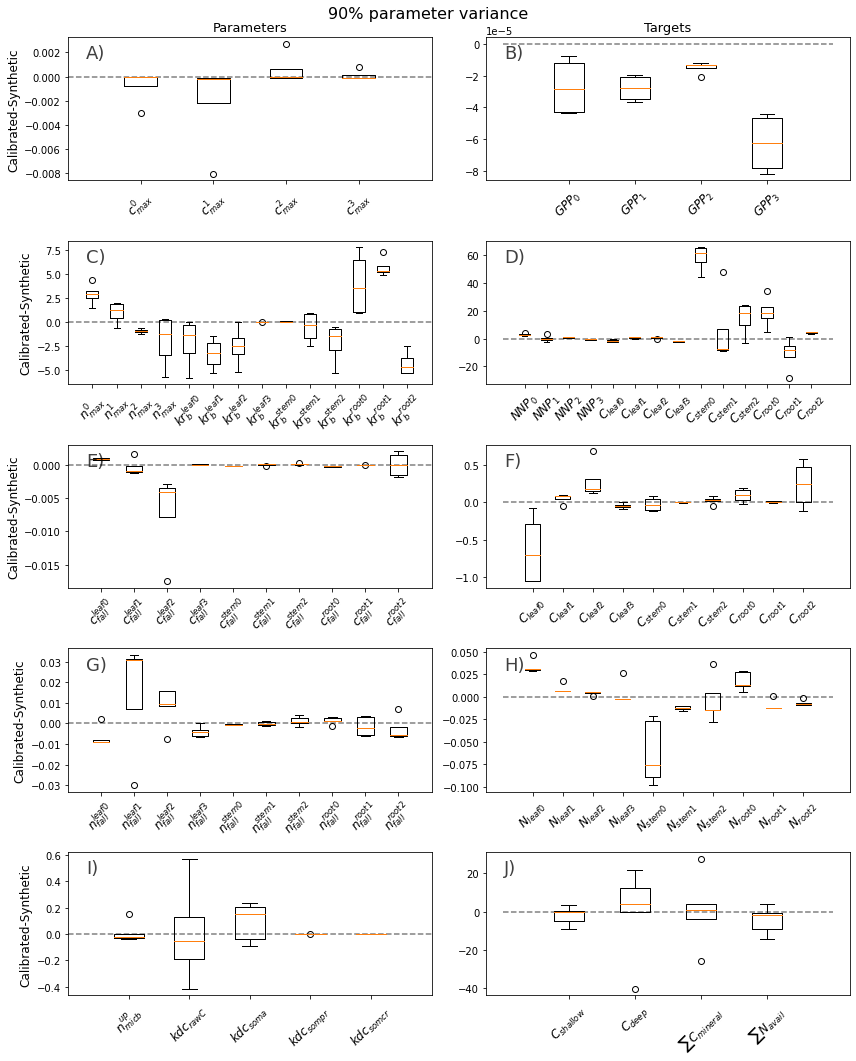

In [9]:
case=90

hvegc=[ 'VEGC00','VEGC10','VEGC20',\
    'VEGC01','VEGC11','VEGC21',\
    'VEGC02','VEGC12','VEGC22',\
    'VEGC03']
hvegn=[ 'VEGN00','VEGN10','VEGN20',\
    'VEGN01','VEGN11','VEGN21',\
    'VEGN02','VEGN12','VEGN22',\
    'VEGN03']
hsoil=[ 'CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']

fig, axs = plt.subplots(5, 2, figsize=(12, 15))

if case==10:
    path='10_percent/csv/'
    model='out-cmax-gpp-md1-r-10-EJ.finalresults.csv'
    params='param-cmax-gpp-md1-r-10-EJ.finalresults.csv'
    [cmax,cmax_true,gpp,gpp_true]=get_gpps(path,model,params)
    par_and_target_mean_box_plot(axs[0],cmax,cmax_true,gpp,gpp_true,['A)','B)'])

    model='out-nmax-krb-npp-vegc-md1-r-10-EJ.finalresults.csv'
    params='param-nmax-krb-npp-vegc-md1-r-10-EJ.finalresults.csv'
    [nmax_krb,nmax_krb_true,npp_vegc,npp_vegc_true]=get_npp_vegc(path,model,params)
    par_and_target_mean_box_plot(axs[1],nmax_krb,nmax_krb_true,npp_vegc,npp_vegc_true,['C)','D)'],title=False)
    
    model='out-cfall-vegc-md1-r-10-EJ.finalresults.csv'
    params='param-cfall-vegc-md1-r-10-EJ.finalresults.csv'
    [cfall,cfall_true,npp_vegc,npp_vegc_true]=get_vegc(path,model,params)

    par_and_target_mean_box_plot(axs[2],cfall,cfall_true,npp_vegc[hvegc],npp_vegc_true[hvegc],['E)','F)'],title=False)

    model='out-nfall-npp-vegc-vegn-md1-r-10-EJ.finalresults.csv'
    params='param-nfall-npp-vegc-vegn-md1-r-10-EJ.finalresults.csv'
    [nfall,nfall_true,npp_vegc_vegn,npp_vegc_vegn_true]=get_vegn(path,model,params)

    par_and_target_mean_box_plot(axs[3],nfall,nfall_true,npp_vegc_vegn[hvegn],npp_vegc_vegn_true[hvegn],['G)','H)'],title=False)

    model='out-test_csoil_consil.csv'
    params='param-test_csoil_consil.csv'
    [soil_rates,soil_rates_true,all,all_true]=get_csoil(path,model,params,case)
   
    par_and_target_mean_box_plot(axs[4],soil_rates,soil_rates_true,all[hsoil],all_true[hsoil],['I)','J)'],title=False)
    plt.suptitle('10% parameter variance',fontsize=16)
elif case==20:
    path='20_percent/csv-files/'
    model='out-cmax-gpp-md1-r-EJ.finalresults.csv'
    params='param-cmax-gpp-md1-r-EJ.finalresults.csv'
    [cmax,cmax_true,gpp,gpp_true]=get_gpps(path,model,params)
    par_and_target_mean_box_plot(axs[0],cmax,cmax_true,gpp,gpp_true,['A)','B)'])

    model='out-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
    params='param-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
    [nmax_krb,nmax_krb_true,npp_vegc,npp_vegc_true]=get_npp_vegc(path,model,params)
    par_and_target_mean_box_plot(axs[1],nmax_krb,nmax_krb_true,npp_vegc,npp_vegc_true,['C)','D)'],title=False)

    model='out-cfall-vegc-md1-r-EJ.finalresults.csv'
    params='param-cfall-vegc-md1-r-EJ.finalresults.csv'
    [cfall,cfall_true,npp_vegc,npp_vegc_true]=get_vegc(path,model,params)
    par_and_target_mean_box_plot(axs[2],cfall,cfall_true,npp_vegc[hvegc],npp_vegc_true[hvegc],['E)','F)'],title=False)

    model='out-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
    params='param-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
    [nfall,nfall_true,npp_vegc_vegn,npp_vegc_vegn_true]=get_vegn(path,model,params)
    par_and_target_mean_box_plot(axs[3],nfall,nfall_true,npp_vegc_vegn[hvegn],npp_vegc_vegn_true[hvegn],['G)','H)'],title=False)

    model='out-csoil-md1-r-EJ.finalresults.csv'
    params='param-csoil-md1-r-EJ.finalresults.csv'
    [soil_rates,soil_rates_true,all,all_true]=get_csoil(path,model,params,case)
    par_and_target_mean_box_plot(axs[4],soil_rates,soil_rates_true,all[hsoil],all_true[hsoil],['I)','J)'],title=False)
    plt.suptitle('20% parameter variance',fontsize=16)
elif case==50:
    path='50_percent/csv/'

    model='out-cmax-gpp-md1-r-EJ.finalresults.csv'
    params='param-cmax-gpp-md1-r-EJ.finalresults.csv'
    [cmax,cmax_true,gpp,gpp_true]=get_gpps(path,model,params)
    par_and_target_mean_box_plot(axs[0],cmax,cmax_true,gpp,gpp_true,['A)','B)'])

    model='out-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
    params='param-nmax-krb-npp-vegc-md1-r-EJ.finalresults.csv'
    [nmax_krb,nmax_krb_true,npp_vegc,npp_vegc_true]=get_npp_vegc(path,model,params)
    par_and_target_mean_box_plot(axs[1],nmax_krb,nmax_krb_true,npp_vegc,npp_vegc_true,['C)','D)'],title=False)

    model='out-cfall-vegc-md1-r-EJ.finalresults.csv'
    params='param-cfall-vegc-md1-r-EJ.finalresults.csv'
    [cfall,cfall_true,npp_vegc,npp_vegc_true]=get_vegc(path,model,params)
    par_and_target_mean_box_plot(axs[2],cfall,cfall_true,npp_vegc[hvegc],npp_vegc_true[hvegc],['E)','F)'],title=False)

    model='out-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
    params='param-nfall-npp-vegc-vegn-md1-r-EJ.finalresults.csv'
    [nfall,nfall_true,npp_vegc_vegn,npp_vegc_vegn_true]=get_vegn(path,model,params)
    par_and_target_mean_box_plot(axs[3],nfall,nfall_true,npp_vegc_vegn[hvegn],npp_vegc_vegn_true[hvegn],['G)','H)'],title=False)

    model='out-csoil-md1-r-EJ-50.finalresults.csv'
    params='param-csoil-md1-r-EJ-50.finalresults.csv'
    [soil_rates,soil_rates_true,all,all_true]=get_csoil(path,model,params,case)
    par_and_target_mean_box_plot(axs[4],soil_rates,soil_rates_true,all,all_true,['I)','J)'],title=False)
    plt.suptitle('50% parameter variance',fontsize=16)
elif case==90:
    path='90_percent/csv/'
    model='out-cmax-gpp-md1-r-90-EJ.finalresults.csv'
    params='param-cmax-gpp-md1-r-90-EJ.finalresults.csv'
    [cmax,cmax_true,gpp,gpp_true]=get_gpps(path,model,params)
    par_and_target_mean_box_plot(axs[0],cmax,cmax_true,gpp,gpp_true,['A)','B)'])

    model='out-nmax-krb-npp-vegc-md1-r-90-EJ.finalresults.csv'
    params='param-nmax-krb-npp-vegc-md1-r-90-EJ.finalresults.csv'
    [nmax_krb,nmax_krb_true,npp_vegc,npp_vegc_true]=get_npp_vegc(path,model,params)
    par_and_target_mean_box_plot(axs[1],nmax_krb,nmax_krb_true,npp_vegc,npp_vegc_true,['C)','D)'],title=False)

    model='out-cfall-vegc-md1-r-90-EJ.finalresults.csv'
    params='param-cfall-vegc-md1-r-90-EJ.finalresults.csv'
    [cfall,cfall_true,npp_vegc,npp_vegc_true]=get_vegc(path,model,params)
    par_and_target_mean_box_plot(axs[2],cfall,cfall_true,npp_vegc[hvegc],npp_vegc_true[hvegc],['E)','F)'],title=False)

    model='out-nfall-npp-vegc-vegn-md1-r-90-EJ.finalresults.csv'
    params='param-nfall-npp-vegc-vegn-md1-r-90-EJ.finalresults.csv'
    [nfall,nfall_true,npp_vegc_vegn,npp_vegc_vegn_true]=get_vegn(path,model,params)
    par_and_target_mean_box_plot(axs[3],nfall,nfall_true,npp_vegc_vegn[hvegn],npp_vegc_vegn_true[hvegn],['G)','H)'],title=False)

    model='out-config-csoil-md1-10-test.csv'
    params='param-config-csoil-md1-10-test.csv'
    [soil_rates,soil_rates_true,all,all_true]=get_csoil(path,model,params,case)
    par_and_target_mean_box_plot(axs[4],soil_rates,soil_rates_true,all[hsoil],all_true[hsoil],['I)','J)'],title=False)
    plt.suptitle('90% parameter variance',fontsize=16)

plt.tight_layout()


## Actual Data

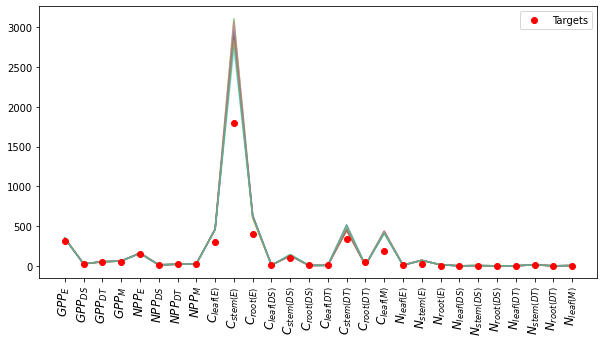

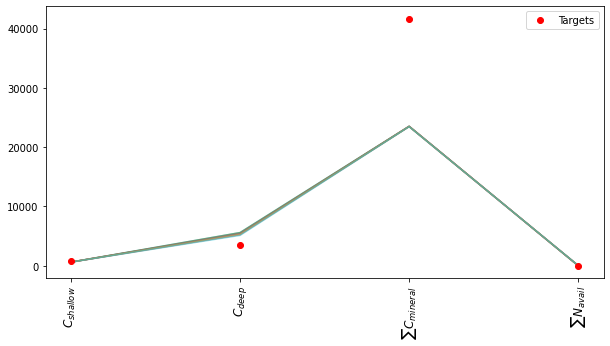

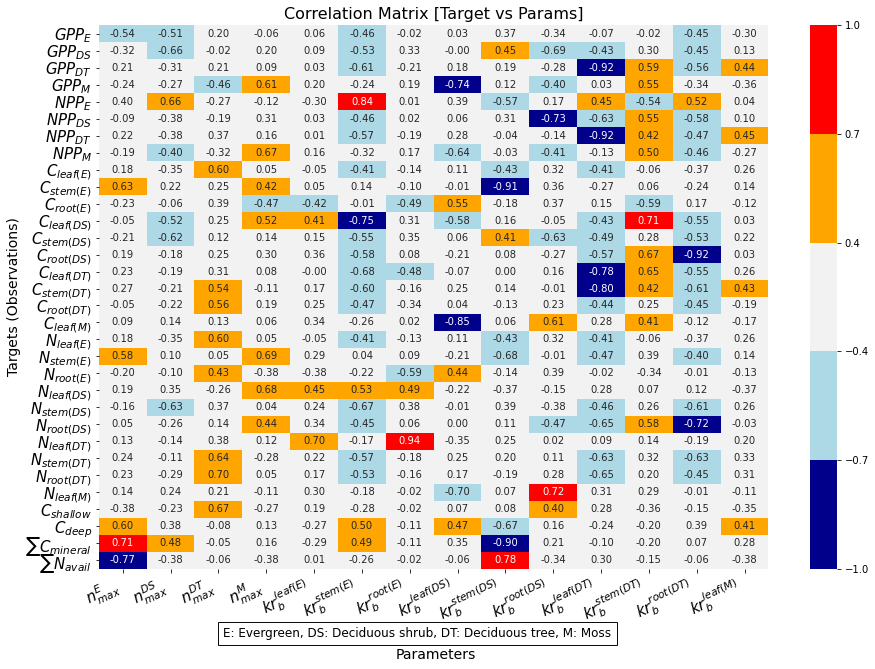

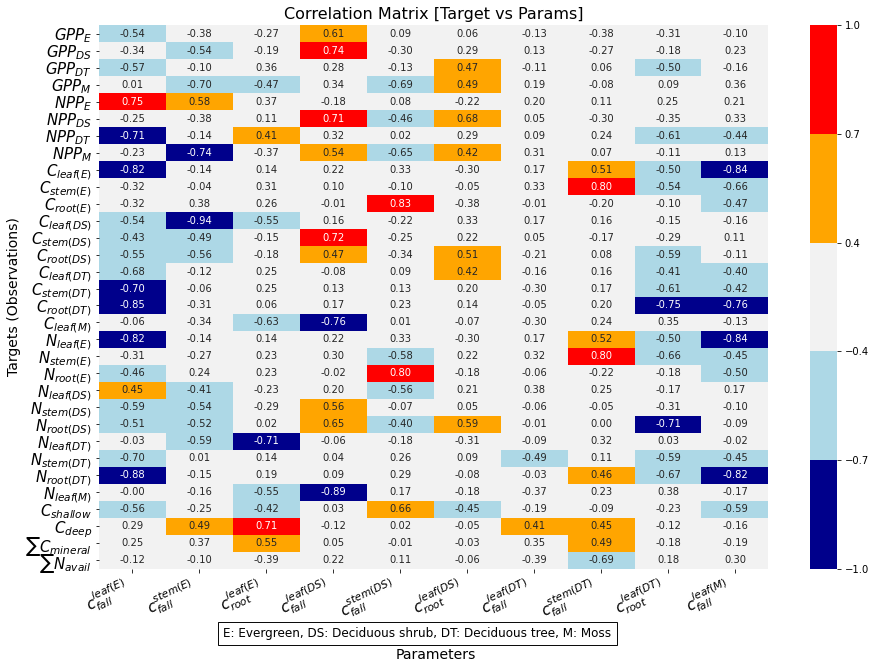

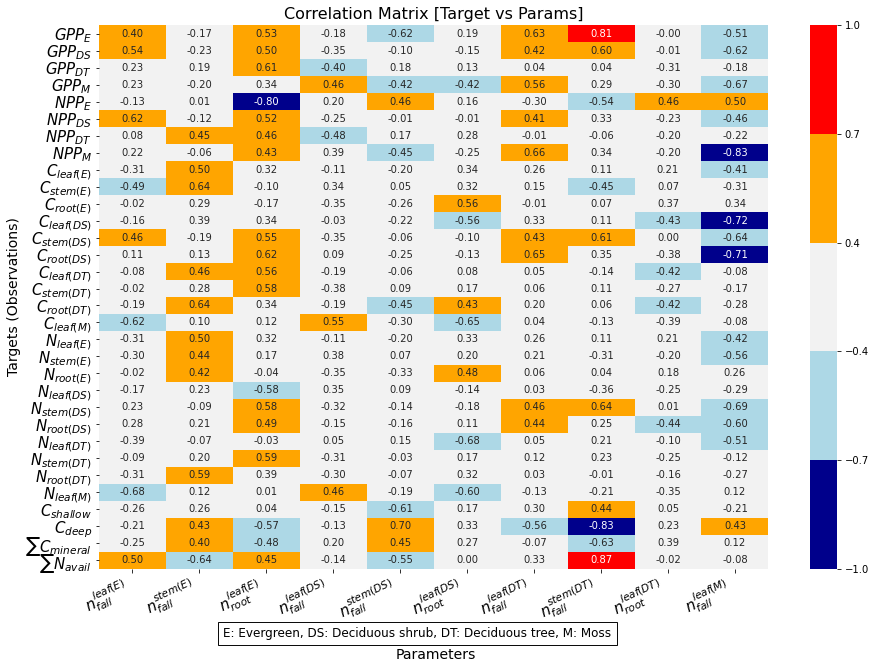

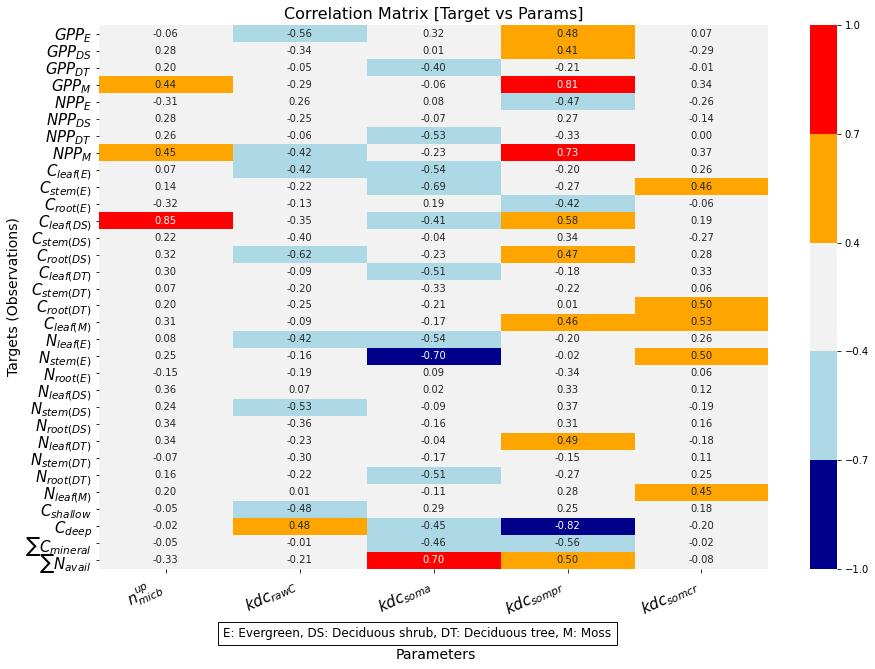

In [2]:
#latest run 1000 sample 
path='sa-csoil-all-var5md/' #10% variance
params='sample_matrix.csv'
model='results.csv'
df_model = pd.read_csv(path+model,header=None)

#PFTs: 'EverTree', 'DecidShrub', 'DecidTree', 'Moss'$C_{leaf(E)}$
output_name = ['$GPP_E$','$GPP_{DS}$','$GPP_{DT}$','$GPP_M$',
               '$NPP_E$','$NPP_{DS}$','$NPP_{DT}$','$NPP_M$',
               '$C_{leaf(E)}$','$C_{stem(E)}$','$C_{root(E)}$',
               '$C_{leaf(DS)}$','$C_{stem(DS)}$','$C_{root(DS)}$',
               '$C_{leaf(DT)}$','$C_{stem(DT)}$','$C_{root(DT)}$','$C_{leaf(M)}$',
               '$N_{leaf(E)}$','$N_{stem(E)}$','$N_{root(E)}$',
               '$N_{leaf(DS)}$','$N_{stem(DS)}$','$N_{root(DS)}$',
               '$N_{leaf(DT)}$','$N_{stem(DT)}$','$N_{root(DT)}$','$N_{leaf(M)}$',
               '$C_{shallow}$','$C_{deep}$','$\sum C_{mineral}$','$\sum N_{avail}$']   
df_model.columns = output_name

df_param = pd.read_csv(path+params)

output_name = ['$n_{max}^{E}$','$n_{max}^{DS}$','$n_{max}^{DT}$','$n_{max}^{M}$',
               '$kr_{b}^{leaf(E)}$','$kr_{b}^{stem(E)}$','$kr_{b}^{root(E)}$',
               '$kr_{b}^{leaf(DS)}$','$kr_{b}^{stem(DS)}$','$kr_{b}^{root(DS)}$',
               '$kr_{b}^{leaf(DT)}$','$kr_{b}^{stem(DT)}$','$kr_{b}^{root(DT)}$','$kr_{b}^{leaf(M)}$',
                '$c_{fall}^{leaf(E)}$','$c_{fall}^{stem(E)}$','$c_{root}^{leaf(E)}$',
                '$c_{fall}^{leaf(DS)}$','$c_{fall}^{stem(DS)}$','$c_{root}^{leaf(DS)}$',
                '$c_{fall}^{leaf(DT)}$','$c_{fall}^{stem(DT)}$','$c_{root}^{leaf(DT)}$','$c_{fall}^{leaf(M)}$',
                '$n_{fall}^{leaf(E)}$','$n_{fall}^{stem(E)}$','$n_{root}^{leaf(E)}$',
                '$n_{fall}^{leaf(DS)}$','$n_{fall}^{stem(DS)}$','$n_{root}^{leaf(DS)}$',
                '$n_{fall}^{leaf(DT)}$','$n_{fall}^{stem(DT)}$','$n_{root}^{leaf(DT)}$','$n_{fall}^{leaf(M)}$',
                '$n^{up}_{micb}$', '$kdc_{rawC}$', '$kdc_{soma}$', '$kdc_{sompr}$', '$kdc_{somcr}$']

df_param.columns = output_name
df_model.head()
df_model.shape
#ut.spaghetti_match_plot(df_param,df_model)

xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
rmetric='r2rmse'
nelem=10
order=True
y_sort=ymodel_MD1.sort_values(by=[rmetric],ascending=order).iloc[:nelem,:-6].copy()
df2 = pd.concat([y_sort, df_model.iloc[-1:]], ignore_index=True)

x_sort=xparams_MD1.sort_values(by=[rmetric],ascending=order).iloc[:nelem,:-6].copy()

ut.spaghetti_match_plot(x_sort.iloc[:,:-4],df2.iloc[:,:-4])
ut.spaghetti_match_plot(x_sort.iloc[:,-4:],df2.iloc[:,-4:])


def get_output_param_corr(df_param, df_model, fig_size_xy=(15, 10)):
    '''
    df_param: parameter dataframe
    df_model: model dataframe
    fig_size_xy: (x_size, y_size) tuple for figure size
    '''
    # Compute the correlation matrix
    corr_mp = pd.DataFrame(columns=df_param.columns, index=df_model.columns)
    for model_col in df_model.columns:
        for param_col in df_param.columns:
            corr = df_model[model_col].corr(df_param[param_col])
            corr_mp.loc[model_col, param_col] = corr

    # Convert correlation matrix to float datatype
    corr_mp = corr_mp.astype(float)

    # Define discrete color levels and colormap
    color_levels = [-1.0, -0.7, -0.4, 0.4, 0.7, 1.0]  # Correlation ranges
    colors = ['darkblue', 'lightblue', '#f2f2f2', 'orange', 'red']  # Corresponding colors
    cmap = LinearSegmentedColormap.from_list('custom_discrete', colors, N=len(color_levels) - 1)
    norm = BoundaryNorm(color_levels, cmap.N, clip=True)

    # Create the heatmap
    plt.figure(figsize=fig_size_xy)
    sns.heatmap(corr_mp, cmap=cmap, norm=norm, annot=True, fmt=".2f", cbar_kws={'ticks': color_levels})
    
    # Customize tick font size
    tick_fontsize=15
    plt.xticks(fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    plt.xticks(rotation=25, ha='right')

    # Add labels and title
    plt.title("Correlation Matrix [Target vs Params]", fontsize=16)
    plt.ylabel("Targets (Observations)", fontsize=14)
    #plt.xlabel("Parameters", fontsize=14)
    plt.figtext(0.4, 0.0, "Parameters", fontsize=14)

        # Add textbox at the bottom
    plt.figtext(0.42, 0.03, "E: Evergreen, DS: Deciduous shrub, DT: Deciduous tree, M: Moss",
                ha="center", fontsize=12, bbox={"facecolor": "white", "alpha": 0.95, "pad": 5})


    return 

get_output_param_corr(x_sort.iloc[:,:14],y_sort.iloc[:,:])

get_output_param_corr(x_sort.iloc[:,14:-15],y_sort.iloc[:,:])#

get_output_param_corr(x_sort.iloc[:,24:-5],y_sort.iloc[:,:])

get_output_param_corr(x_sort.iloc[:,-5:],y_sort.iloc[:,:])